<a href="https://colab.research.google.com/github/MA541121/EconomiaIII/blob/main/Expo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree # Added import
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Added import

In [41]:
df_3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/2006_2022INGRESOS.csv')
df_3

,Deciles de hogares,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Total,43698,42865,37574,38125,39719,63565,60916,57370,63695
1,I,7796,7136,6633,6997,7716,11141,11183,11333,13411
2,II,13506,12460,11673,11794,12721,19382,19755,19229,22421
3,III,17780,16792,15611,15734,16677,25811,26288,25400,29201
4,IV,22161,20986,19650,19513,20675,32138,32743,31426,35947
5,V,27072,25628,23973,23914,24901,39311,39640,38050,43341
6,VI,32611,31501,29059,28862,29852,47537,47777,45737,51924
7,VII,40357,39381,35605,35570,36223,57904,57979,55501,62412
8,VIII,50788,50084,45089,44849,45478,72868,72239,69103,76736
9,IX,69194,69159,61133,61014,62163,98333,96445,91726,100866


In [91]:
df_long1 = df_3.melt(id_vars=["Deciles de hogares"],
                  var_name="Año",
                  value_name="Ingreso")
df_long1["Año"] = df_long1["Año"].astype(int)

In [93]:
df_long1 = df_long1[df_long1["Deciles de hogares"] != "Total"].reset_index(drop=True)

In [94]:
le1 = LabelEncoder()
df_long1["Decil_cod"] = le1.fit_transform(df_long1["Deciles de hogares"])

In [95]:
df_long1.head(18)

,Deciles de hogares,Año,Ingreso,Decil_cod
0,I,2006,7796,0
1,II,2006,13506,1
2,III,2006,17780,2
3,IV,2006,22161,3
4,V,2006,27072,5
5,VI,2006,32611,6
6,VII,2006,40357,7
7,VIII,2006,50788,8
8,IX,2006,69194,4
9,X,2006,155715,9


In [96]:
X2 = df_long1[["Año", "Decil_cod"]]
y2 = df_long1["Ingreso"]

In [97]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [98]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [99]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X2_train_scaled, y2_train)

DecisionTreeRegressor(random_state=42)

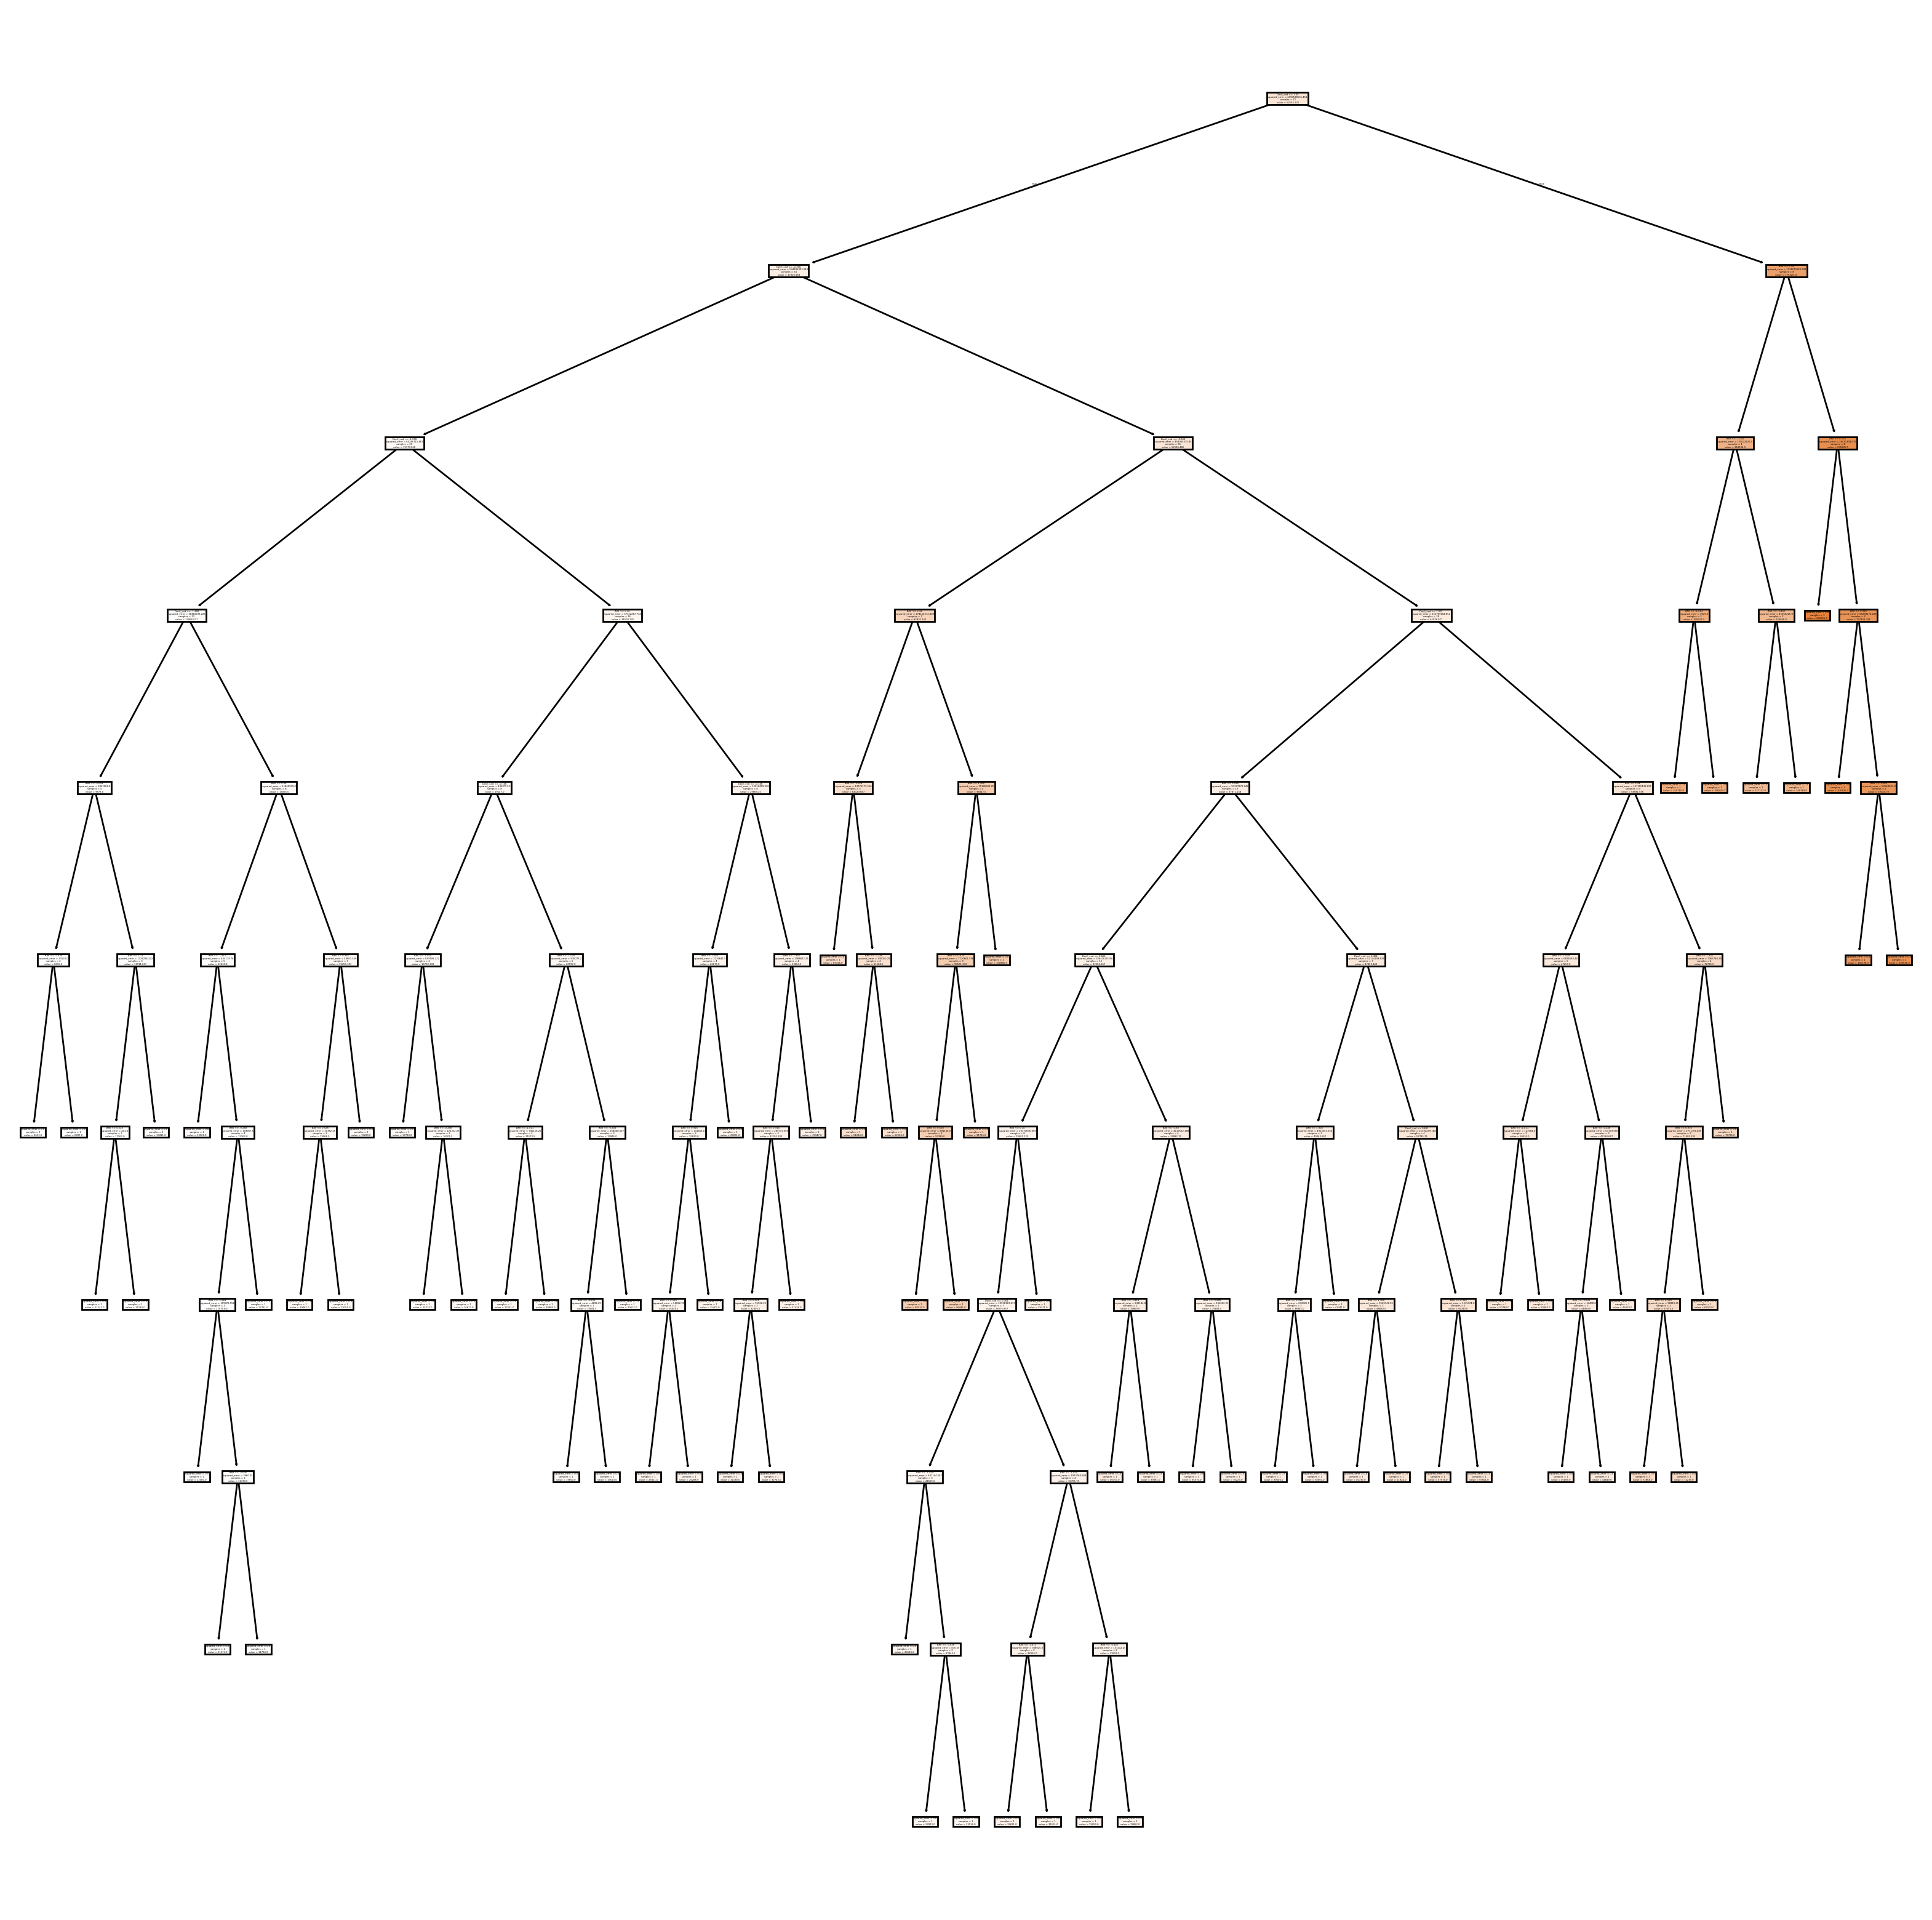

In [58]:
plt.figure(figsize=(20,20),dpi=200)
plot_tree(dt,feature_names=X2.columns,filled=True)
plt.show()

In [100]:
rf = RandomForestRegressor(random_state=42)#, n_estimators=100)
rf.fit(X2_train_scaled, y2_train)


RandomForestRegressor(random_state=42)

In [101]:
y2_pred_dt = dt.predict(X2_test_scaled)
y2_pred_dt

array([  6997.,  15734.,  39311.,  13411.,   6633.,  39381., 127313.,
        45737.,   6633.,  23914.,  19229.,  29059.,  36223.,  55501.,
        17780.,  25628.,  69194.,  61014.])

In [102]:
y2_pred_rf = rf.predict(X2_test_scaled)
y2_pred_rf

array([  8617.72,  16299.91,  40778.  ,  14185.93,   7801.52,  38062.6 ,
       134047.38,  45590.64,   7704.69,  26447.58,  18948.89,  29464.05,
        46499.16,  55675.34,  17459.23,  26929.46,  66872.17,  62803.78])

In [103]:
mse_dt=mean_squared_error(y2_test,y2_pred_dt)
mse_dt

36501383.0

In [104]:
mse_rf=mean_squared_error(y2_test,y2_pred_rf)
mse_rf

14783034.368105553

In [105]:
dt_r2=r2_score(y2_test,y2_pred_dt)
dt_r2

0.9608386006358712

In [106]:
dt_r2=r2_score(y2_test,y2_pred_rf)
dt_r2

0.9841396608807118

In [107]:
rmse_dt = np.sqrt(mean_squared_error(y2_test, y2_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))
print(f"RMSE Árbol: {rmse_dt:.2f}")
print(f"RMSE Bosque: {rmse_rf:.2f}")

RMSE Árbol: 6041.64
RMSE Bosque: 3844.87


**Grafica de dispersión**


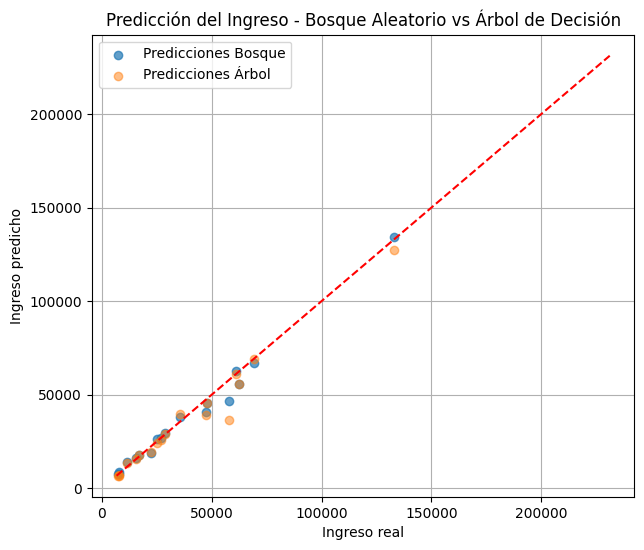

In [110]:
plt.figure(figsize=(7, 6))
plt.scatter(y2_test, y2_pred_rf, alpha=0.7, label="Predicciones Bosque")
plt.scatter(y2_test, y2_pred_dt, alpha=0.5, label="Predicciones Árbol")
plt.legend()
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--')
plt.xlabel("Ingreso real")
plt.ylabel("Ingreso predicho")
plt.title("Predicción del Ingreso - Bosque Aleatorio vs Árbol de Decisión")
plt.grid(True)
plt.show()


In [ ]:
df_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/2006_2022GASTO.csv')
df_1

,Deciles de hogares,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Nacional,29518,25711,25699,25555,26467,38415,39147,34108,39965
1,I,7073,7863,8084,7857,8005,12426,12338,13548,14722
2,II,10767,11098,10628,10447,11261,17206,17534,16913,19219
3,III,14332,13666,13420,12770,13832,20757,21257,20258,23337
4,IV,16834,16214,15673,15037,16132,24668,25023,23397,27282
5,V,20396,18965,18349,18515,18726,28689,29571,26619,30801
6,VI,23581,22228,20720,20321,21065,32552,33593,30263,35466
7,VII,28082,25168,25197,24641,24696,38660,39253,34911,40150
8,VIII,34518,30161,30103,31396,30010,45109,46621,40450,47723
9,IX,45337,40593,40323,38921,39905,58478,59110,50791,58706


In [ ]:
df_long = df_1.melt(id_vars=["Deciles de hogares"],
                  var_name="Año",
                  value_name="Gasto")
df_long["Año"] = df_long["Año"].astype(int)

In [ ]:
df_long

,Deciles de hogares,Año,Gasto
0,Nacional,2006,29518
1,I,2006,7073
2,II,2006,10767
3,III,2006,14332
4,IV,2006,16834
...,...,...,...
94,VI,2022,35466
95,VII,2022,40150
96,VIII,2022,47723
97,IX,2022,58706


In [ ]:
df_long = df_long[df_long["Deciles de hogares"] != "Nacional"].reset_index(drop=True)

In [ ]:
df_long

,Deciles de hogares,Año,Gasto
0,I,2006,7073
1,II,2006,10767
2,III,2006,14332
3,IV,2006,16834
4,V,2006,20396
...,...,...,...
85,VI,2022,35466
86,VII,2022,40150
87,VIII,2022,47723
88,IX,2022,58706


In [ ]:
le = LabelEncoder()
df_long["Decil_cod"] = le.fit_transform(df_long["Deciles de hogares"])

In [ ]:
df_long

,Deciles de hogares,Año,Gasto,Decil_cod
0,I,2006,7073,0
1,II,2006,10767,1
2,III,2006,14332,2
3,IV,2006,16834,3
4,V,2006,20396,5
...,...,...,...,...
85,VI,2022,35466,6
86,VII,2022,40150,7
87,VIII,2022,47723,8
88,IX,2022,58706,4


In [ ]:
X = df_long[["Año", "Decil_cod"]]
y = df_long["Gasto"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

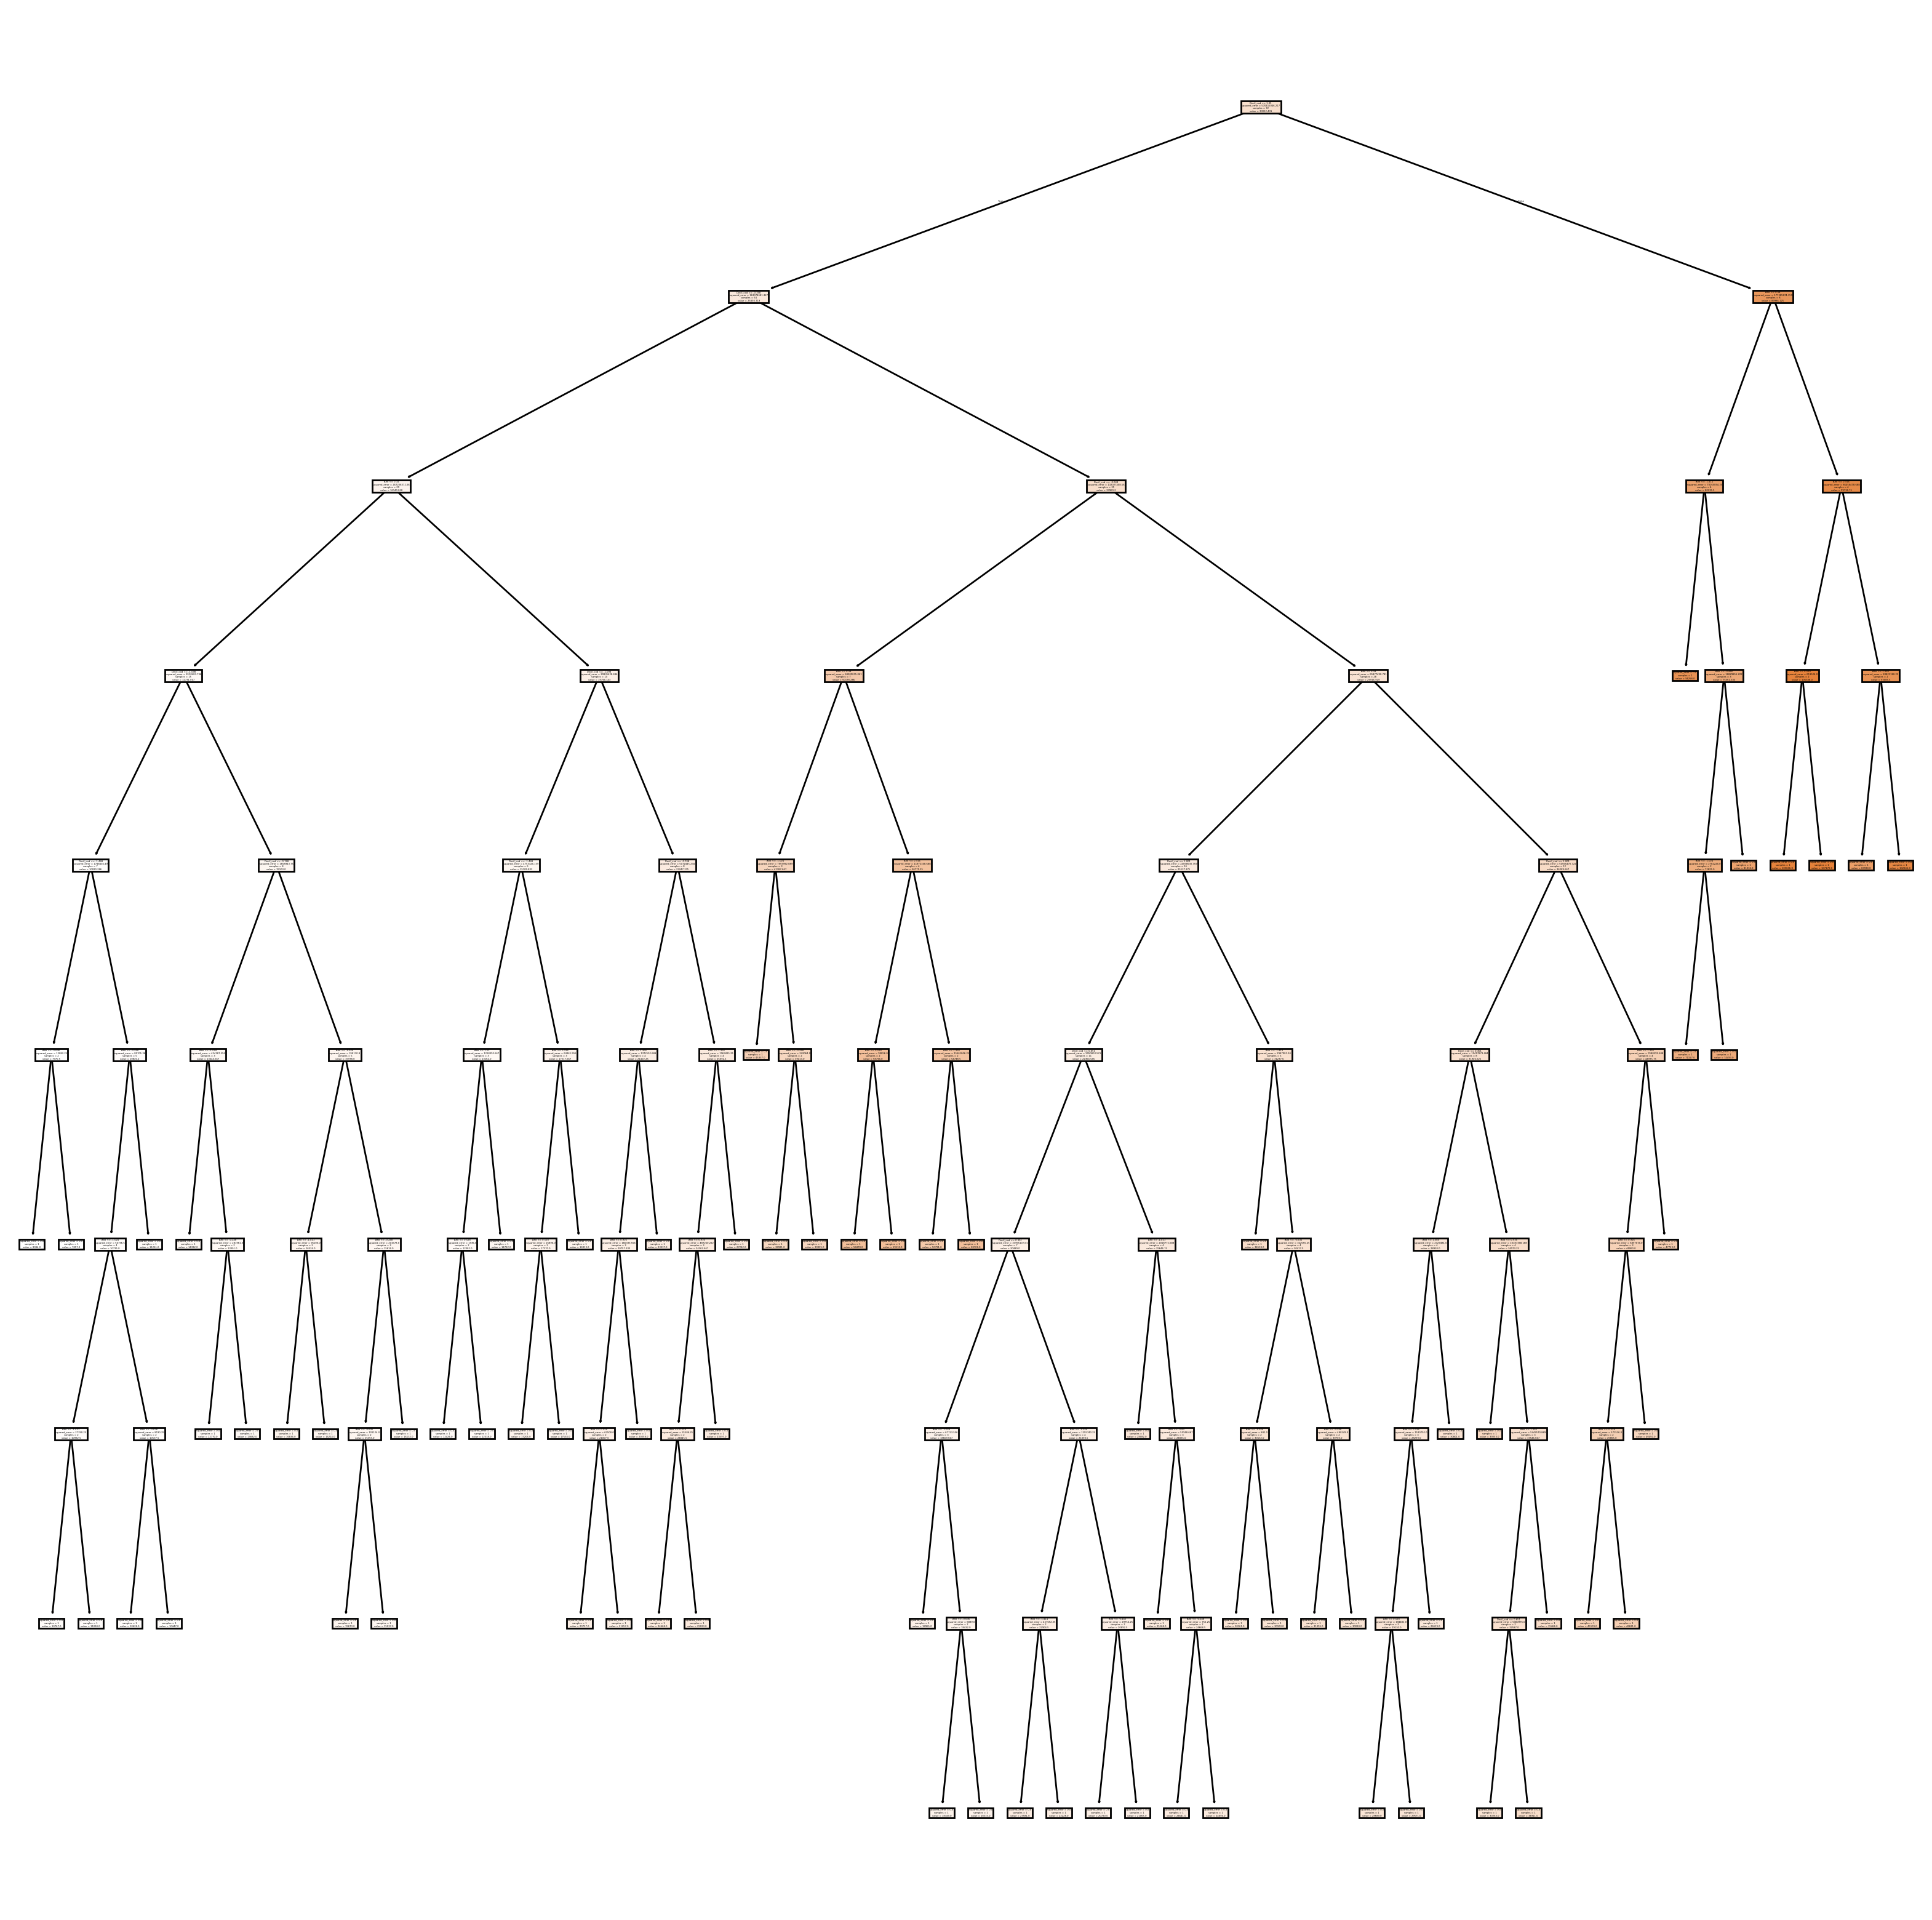

In [ ]:
plt.figure(figsize=(20,20),dpi=200)
plot_tree(dt,feature_names=X.columns,filled=True)
plt.show()

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt

array([ 7857., 12770., 39253., 14722.,  8084., 25168., 74493., 39253.,
        8084., 18515., 16913., 20720., 39253., 35466., 14332., 18965.,
       45337., 38921.])

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([ 8889.71, 13263.75, 29576.32, 14662.61,  8622.93, 25153.88,
       76354.12, 32415.86,  8642.46, 19626.1 , 16859.99, 21084.55,
       33259.79, 36545.83, 14067.88, 20455.32, 42745.38, 39539.22])

In [ ]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

7551866.944444444

In [ ]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

3907126.964511107

In [ ]:
dt_r2=r2_score(y_test,y_pred_dt)
dt_r2

0.9727221339364397

In [ ]:
dt_r2=r2_score(y_test,y_pred_rf)
dt_r2

0.9858871869942487

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE Árbol: {rmse_dt:.2f}")
print(f"RMSE Bosque: {rmse_rf:.2f}")

RMSE Árbol: 2748.07
RMSE Bosque: 1976.65


**Grafica de dispersión**


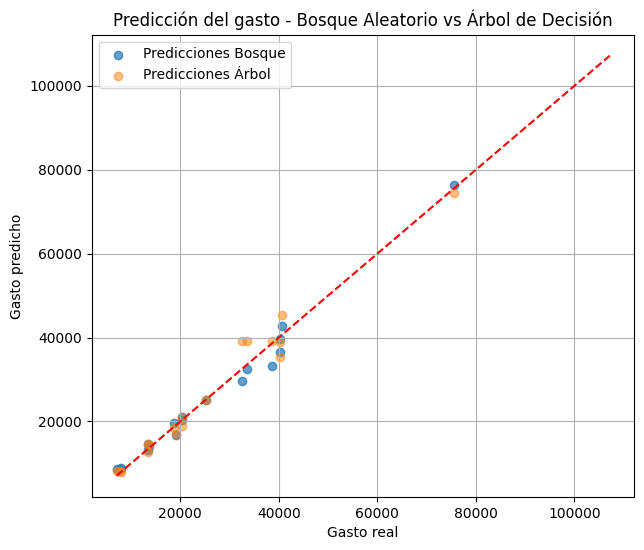

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="Predicciones Bosque")
plt.scatter(y_test, y_pred_dt, alpha=0.5, label="Predicciones Árbol")
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Gasto real")
plt.ylabel("Gasto predicho")
plt.title("Predicción del gasto - Bosque Aleatorio vs Árbol de Decisión")
plt.grid(True)
plt.show()

In [ ]:
df_4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/Canastabasica.csv')
df_4

,Unnamed: 0,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Gasto Corriente Monetario,29518,25711,25699,25555,26467,38415,39147,34108,39965
1,"Alim,Beb,Tabaco",8695,8674,8417,8688,9031,13502,13787,12977,15059
2,Vestido y calzado,1735,1354,1427,1307,1240,1777,1754,1018,1523
3,"Vivienda,Combustibles",2624,2572,2394,2264,2508,3658,3733,3746,3793
4,Artic. Y serv casa,1881,1541,1591,1546,1638,2267,2297,2233,2432
5,Salud,1204,803,689,636,654,1037,1028,1443,1345
6,Transp. Y Comunicaciones,5592,4733,4764,4720,4971,7427,7811,6331,7714
7,Educacion y esparcimirento,4572,3457,3501,3529,3714,4780,4742,2619,3921
8,Cuidados personales,1938,1791,2099,1874,1906,2840,2898,2731,3075
9,Tranfer. De gasto,1277,787,817,989,806,1127,1096,1009,1101


In [ ]:
df_3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/2006_2022_IGRESOTr.csv')
df_3

,Año,Total,I,II,III,IV,V,VI,VII,VIII,IX,X
0,2006,43698,7796,13506,17780,22161,27072,32611,40357,50788,69194,155715
1,2008,42865,7136,12460,16792,20986,25628,31501,39381,50084,69159,155525
2,2010,37574,6633,11673,15611,19650,23973,29059,35605,45089,61133,127313
3,2012,38125,6997,11794,15734,19513,23914,28862,35570,44849,61014,133003
4,2014,39719,7716,12721,16677,20675,24901,29852,36223,45478,62163,140783
5,2016,63565,11141,19382,25811,32138,39311,47537,57904,72868,98333,231226
6,2018,60916,11183,19755,26288,32743,39640,47777,57979,72239,96445,205106
7,2020,57370,11333,19229,25400,31426,38050,45737,55501,69103,91726,186198
8,2022,63695,13411,22421,29201,35947,43341,51924,62412,76736,100866,200696


In [ ]:
df_3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/2006_2022INGRESOS.csv')
df_3

,Deciles de hogares,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Total,43698,42865,37574,38125,39719,63565,60916,57370,63695
1,I,7796,7136,6633,6997,7716,11141,11183,11333,13411
2,II,13506,12460,11673,11794,12721,19382,19755,19229,22421
3,III,17780,16792,15611,15734,16677,25811,26288,25400,29201
4,IV,22161,20986,19650,19513,20675,32138,32743,31426,35947
5,V,27072,25628,23973,23914,24901,39311,39640,38050,43341
6,VI,32611,31501,29059,28862,29852,47537,47777,45737,51924
7,VII,40357,39381,35605,35570,36223,57904,57979,55501,62412
8,VIII,50788,50084,45089,44849,45478,72868,72239,69103,76736
9,IX,69194,69159,61133,61014,62163,98333,96445,91726,100866


In [120]:
df_2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/INPC.csv')
df_2

,Periodos,Porcentaje Inflación
0,2008/01,3.70
1,2008/02,3.72
2,2008/03,4.25
3,2008/04,4.55
4,2008/05,4.95
...,...,...
201,2024/10,4.76
202,2024/11,4.55
203,2024/12,4.21
204,2025/01,3.59


In [122]:
df_2['Mes'] = df_2['Periodos'].str.split('/').str[1]
df_2['Año'] = df_2['Periodos'].str.split('/').str[0].astype(int)
df_2

,Periodos,Porcentaje Inflación,Mes,Año
0,2008/01,3.70,01,2008
1,2008/02,3.72,02,2008
2,2008/03,4.25,03,2008
3,2008/04,4.55,04,2008
4,2008/05,4.95,05,2008
...,...,...,...,...
201,2024/10,4.76,10,2024
202,2024/11,4.55,11,2024
203,2024/12,4.21,12,2024
204,2025/01,3.59,01,2025


In [87]:
X1 = df_2[["Año", "Mes"]]
y1 = df_2["Porcentaje Inflación"]

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [89]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X1_train, y1_train)


RandomForestRegressor(random_state=42)

In [90]:
y1_pred_rf = rf.predict(X1_test)
y1_pred_rf

array([5.8975, 5.5806, 4.4807, 4.0472, 4.512 , 2.6784, 6.3882, 5.8442,
       3.5686, 6.1895, 2.6381, 6.1908, 4.4016, 8.4922, 3.9021, 2.6295,
       5.4246, 3.1468, 3.9113, 6.7408, 4.1074, 3.56  , 2.5964, 3.7159,
       4.5163, 5.6595, 8.1321, 5.2614, 4.8067, 4.762 , 4.4232, 5.0942,
       6.8178, 3.1968, 6.1456, 4.4413, 5.711 , 4.4677, 3.3179, 3.4223,
       6.4521, 4.3915])

In [111]:
mse1_rf=mean_squared_error(y1_test,y1_pred_rf)
mse1_rf

0.28951345285714264

In [112]:
dt_r2_1=r2_score(y1_test,y1_pred_rf)
dt_r2_1

0.8962214892846562

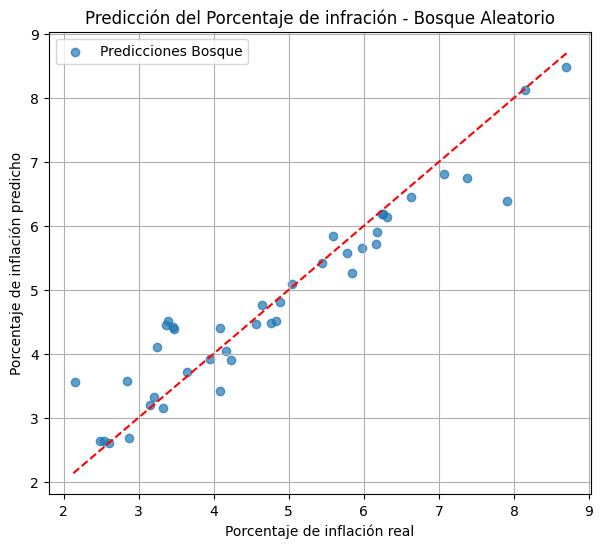

In [115]:
plt.figure(figsize=(7, 6))
plt.scatter(y1_test, y1_pred_rf, alpha=0.7, label="Predicciones Bosque")
plt.legend()
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--')
plt.xlabel("Porcentaje de inflación real")
plt.ylabel("Porcentaje de inflación predicho")
plt.title("Predicción del Porcentaje de infración - Bosque Aleatorio")
plt.grid(True)
plt.show()

In [121]:
dg=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_modelo/Canastabasica.csv')
dg

,Unnamed: 0,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Gasto Corriente Monetario,29518,25711,25699,25555,26467,38415,39147,34108,39965
1,"Alim,Beb,Tabaco",8695,8674,8417,8688,9031,13502,13787,12977,15059
2,Vestido y calzado,1735,1354,1427,1307,1240,1777,1754,1018,1523
3,"Vivienda,Combustibles",2624,2572,2394,2264,2508,3658,3733,3746,3793
4,Artic. Y serv casa,1881,1541,1591,1546,1638,2267,2297,2233,2432
5,Salud,1204,803,689,636,654,1037,1028,1443,1345
6,Transp. Y Comunicaciones,5592,4733,4764,4720,4971,7427,7811,6331,7714
7,Educacion y esparcimirento,4572,3457,3501,3529,3714,4780,4742,2619,3921
8,Cuidados personales,1938,1791,2099,1874,1906,2840,2898,2731,3075
9,Tranfer. De gasto,1277,787,817,989,806,1127,1096,1009,1101
